<a href="https://colab.research.google.com/github/anghammakthri/ParisPOIExplorer/blob/main/Angham_Makthri_2LM1TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous le nom, le prénom et le numéro étudiant de chaque membre du binôme :
</div>

In [ ]:
# Makthri Angham
# Zallel Yasmin

# TP 03 - Variables quantitatives - Histogrammes

# Partie I - Variables quantitatives

<div class="alert alert-block alert-warning">
Nous allons reprendre dans ce TME les données du TME 1 sur la géolocalisation de points d'intérêt dans Paris.
</div>

<div class="alert alert-block alert-info">
Tout d'abord, exécuter le bloc ci-dessous pour importer les bibliothèques Pandas, MatPlotLib et Numpy puis charger le tableau des données sur les points d'intérêt parisiens.
</div>

In [ ]:
import pandas as pd # Chargement de la bibliothèque pandas
pd.options.mode.chained_assignment = None  # default='warn', désactive un warning lors de la création de nouvelles colonnes
%matplotlib inline
import matplotlib.pyplot as plt # Chargement de la bibliothèque matpoltlib
import numpy as np # Chargement de la bibliothèque numpy

# Chargement du fichier de données
# corriger le lien
lien = "https://drive.google.com/uc?id=1dMEwdsvkQ84SQE4tcVjyqg_BBZLZmMLW&export=download"
tableau_poi = pd.read_csv(lien)

In [ ]:
tableau_poi

,nom,latitude,longitude,note,prix,furniture_store,laundry,bakery,cafe,home_goods_store,clothing_store,atm,lodging,night_club,convenience_store,restaurant,bar
0,Unopiu,48.866632,2.331637,2.2,-1,1,0,0,0,1,0,0,0,0,0,0,0
1,Olivier Hutzemakers,48.903289,2.339881,-1.0,-1,1,0,0,0,1,0,0,0,0,0,0,0
2,Téodor,48.847633,2.375378,-1.0,-1,1,0,0,0,1,0,0,0,0,0,0,0
3,Féau and Co.,48.879841,2.297154,5.0,-1,1,0,0,0,1,0,0,0,0,0,0,0
4,Patoux Florence Marie-therese,48.827933,2.309074,-1.0,-1,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31847,Le Rallye Bar,48.858395,2.425150,-1.0,-1,0,0,0,0,0,0,0,0,0,0,0,1
31848,lotus de chine,48.914816,2.382295,-1.0,-1,0,0,0,0,0,0,0,0,0,0,0,1
31849,King George,48.874817,2.341561,4.1,-1,0,0,0,0,0,0,0,0,0,0,1,1
31850,Le Révérend,48.914967,2.286391,4.5,-1,0,0,0,0,0,0,0,0,0,0,0,1


## 1 - Analyse des notes

<div class="alert alert-block alert-info">
Q1.1.a - Définir une variable <code>bars</code> ne contenant que les lieux qui sont des bars, ne sont pas des restaurants et ont une note attribuée.
</div>

In [ ]:
bars = tableau_poi[(tableau_poi["bar"]==1)& (tableau_poi["restaurant"]==0)&(tableau_poi["note"]!=-1) ]

* vérifications

In [ ]:
bars[["bar","restaurant","note"]]

,bar,restaurant,note
2992,1,0,3.4
3034,1,0,3.0
6988,1,0,3.6
6990,1,0,3.0
7032,1,0,3.7
...,...,...,...
31840,1,0,4.0
31842,1,0,4.2
31844,1,0,4.3
31846,1,0,3.4


* Autre méthode

In [ ]:
tableau_poi.query("bar==1 and restaurant==0 and note !=-1")[["bar","restaurant","note"]]

,bar,restaurant,note
2992,1,0,3.4
3034,1,0,3.0
6988,1,0,3.6
6990,1,0,3.0
7032,1,0,3.7
...,...,...,...
31840,1,0,4.0
31842,1,0,4.2
31844,1,0,4.3
31846,1,0,3.4


<div class="alert alert-block alert-info">
Q1.1.b - Définir une variable <code>restos</code> ne contenant que les lieux qui sont des restaurants, ne sont pas des bars et ont une note attribuée.
</div>

In [ ]:
restos = tableau_poi.query("bar==0 and restaurant==1 and note !=-1")

<div class="alert alert-block alert-info">
Q1.1.c - Définir une variable <code>barestos</code> ne contenant que les lieux qui sont à la fois des restaurants et des bars et ont une note attribuée.
</div>

In [ ]:
barestos = tableau_poi.query("bar==1 and restaurant==1 and note !=-1")

<div class="alert alert-block alert-warning">
Pour faire des analyses de variables quantitatives, numpy dispose des fonctions suivantes :

<ul>
    <li> <code>np.mean()</code> qui permet de calculer la moyenne  : <code>np.mean(tableau_poi['note'])</code> </li>
<li> <code>np.std()</code> qui permet de calculer l'écart-type : <code>np.std(tableau_poi['note'])</code> </li>
<li> <code>np.quantile()</code> qui permet de calculer le quantile <code>q</code> : <code>np.quantile(tableau_poi['note'], q)</code> </li>
<li> <code>np.median()</code> qui permet de calculer la médiane : <code>np.median(tableau_poi['note'])</code> </li>
</ul>
</div>    

<div class="alert alert-block alert-info">
Calculer la moyenne, l'écart-type et la médiane des notes de bars et de restaurants. Quelles analyses pouvez-vous en tirer ?
</div>

<div class="alert alert-block alert-info">
Q1.2.a - Calculer un triplet constitué de la moyenne, l'écart-type et la médiane des notes des bars.
</div>

In [ ]:
np.mean(bars["note"]),np.std(bars["note"]),np.median(bars["note"])

(3.9469157254561247, 0.7910152231493471, 4.1)

<div class="alert alert-block alert-info">
Q1.2.b - Calculer un triplet constitué de la moyenne, l'écart-type et la médiane des notes des restaurants.
</div>

In [ ]:
np.mean(restos["note"]),np.std(restos["note"]),np.median(restos["note"])

(3.9539639261744965, 0.6601341322217664, 4.0)

<div class="alert alert-block alert-info">
Q1.2.c - Calculer un triplet constitué de la moyenne, l'écart-type et la médiane des notes des bars-restaurants.
</div>

In [ ]:
np.mean(barestos["note"]),np.std(barestos["note"]),np.median(barestos["note"])

(3.9410493827160495, 0.5817068414701659, 4.0)

<div class="alert alert-block alert-info">
Q1.2.d - Quelle analyse peut-on tirer des trois calculs précédentes ?
</div>

In [ ]:
#####Les bars ont des notes un peu plus hautes en médiane mais les avis des clients varient beaucoup cela veut dire que certains bars sont très bons mais d’autres déçoivent

#Les restaurants ont une moyenne de notes un peu meilleure que les bars-restaurants avec des avis plus constants cela montre que leur qualité est plus régulière

#Les bars-restaurants ont des notes similaires aux restaurants mais les avis sont très semblables entre eux ce qui peut indiquer une offre plus standardisée et uniforme

<div class="alert alert-block alert-info">
Q1.3 - Calculer les différents déciles des notes des bars et restaurants. Cela confirme-t-il l'analyse précédente ?
</div>

In [ ]:
[i/10 for i in range(1,10)] # décile

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
np.quantile(bars['note'], [i/10 for i in range(1,10)])

array([3. , 3.4, 3.8, 4. , 4.1, 4.2, 4.4, 4.5, 5. ])

In [ ]:
np.quantile(restos['note'], [i/10 for i in range(1,10)])

array([3.1 , 3.5 , 3.8 , 3.9 , 4.  , 4.2 , 4.3 , 4.4 , 4.63])

In [ ]:
np.quantile(barestos['note'], [i/10 for i in range(1,10)])

array([3.2, 3.5, 3.8, 3.9, 4. , 4.1, 4.2, 4.4, 4.5])

In [ ]:
##Oui les déciles confirment l’analyse les notes sont très variées avec des différences marquées entre les meilleures et les moins bonnes cela montre que l’expérience dans les bars peut être inégale
#Restaurants les notes sont plus regroupées ce qui indique une qualité plus régulière et stable
#Bars-Restaurants les notes sont encore plus proches les unes des autres ce qui montre une offre plus uniforme et moins variable.

## 2 - Histogrammes et boîtes à moustaches
<div class="alert alert-block alert-warning">
    La fonction <code>plt.hist(data, bins = n)</code> permet de tracer l'histogramme des données <code>data</code> passées en entrée, en discrétisant l'intervalle d'entrée en <code>n</code> segments.
</div>

<div class="alert alert-block alert-info">
Q2.1 - Tracer l'histogramme des notes des bars pour une segmentation de 5, 10, 15, 20, et 50. Que remarquez vous plus le nombre de segments augmente ? Observez vous des pics pour des valeurs particulières ? A vue de nez, quel nombre de segments choisiriez vous ?
</div>

(array([ 22.,  44., 174., 391., 520.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

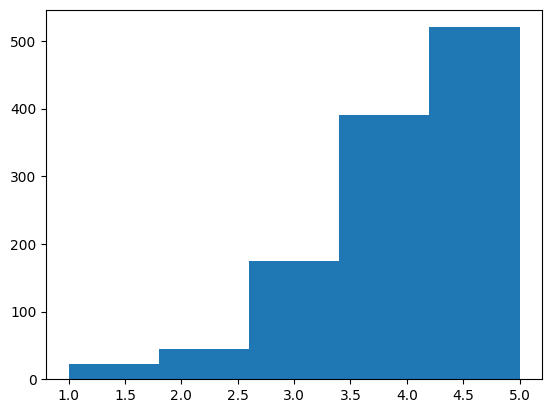

In [ ]:
plt.hist(bars["note"], bins = 5)

(array([ 20.,   2.,  26.,  18.,  30., 144., 151., 240., 306., 214.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

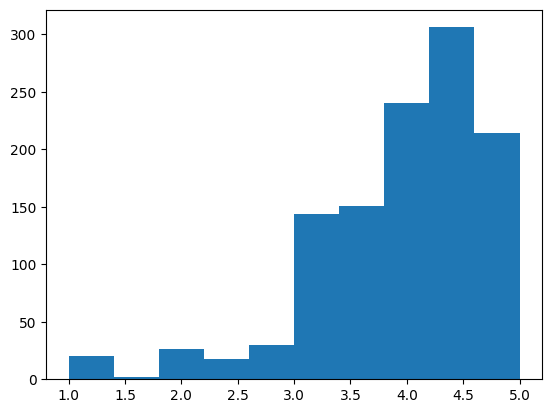

In [ ]:
plt.hist(bars["note"], bins = 10)

(array([ 20.,   0.,   2.,  26.,   6.,  12.,  27.,  80.,  43.,  87., 131.,
        197., 224., 148., 148.]),
 array([1.        , 1.26666667, 1.53333333, 1.8       , 2.06666667,
        2.33333333, 2.6       , 2.86666667, 3.13333333, 3.4       ,
        3.66666667, 3.93333333, 4.2       , 4.46666667, 4.73333333,
        5.        ]),
 <BarContainer object of 15 artists>)

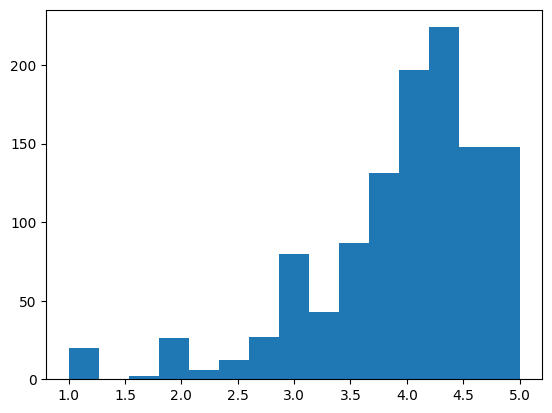

In [ ]:
plt.hist(bars["note"], bins = 15)

(array([ 20.,   0.,   0.,   2.,   2.,  24.,   8.,  10.,  10.,  20.,  77.,
         67.,  42., 109.,  43., 197., 145., 161.,  85., 129.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 20 artists>)

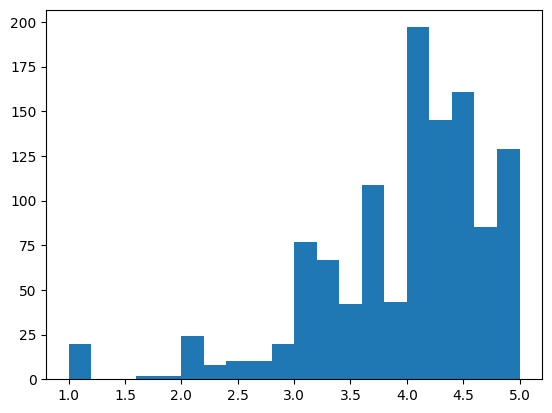

In [ ]:
plt.hist(bars["note"], bins = 20)

(array([ 19.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   2.,
          0.,  24.,   0.,   0.,   0.,   6.,   2.,  10.,   0.,   5.,   5.,
         17.,   3.,   0.,  67.,  10.,  18.,  25.,   0.,  24.,  42.,  21.,
         39.,  49.,   0.,  43., 140.,  57.,   0.,  79.,  66.,  79.,  82.,
          0.,  41.,  25.,  19.,  12., 117.]),
 array([1.  , 1.08, 1.16, 1.24, 1.32, 1.4 , 1.48, 1.56, 1.64, 1.72, 1.8 ,
        1.88, 1.96, 2.04, 2.12, 2.2 , 2.28, 2.36, 2.44, 2.52, 2.6 , 2.68,
        2.76, 2.84, 2.92, 3.  , 3.08, 3.16, 3.24, 3.32, 3.4 , 3.48, 3.56,
        3.64, 3.72, 3.8 , 3.88, 3.96, 4.04, 4.12, 4.2 , 4.28, 4.36, 4.44,
        4.52, 4.6 , 4.68, 4.76, 4.84, 4.92, 5.  ]),
 <BarContainer object of 50 artists>)

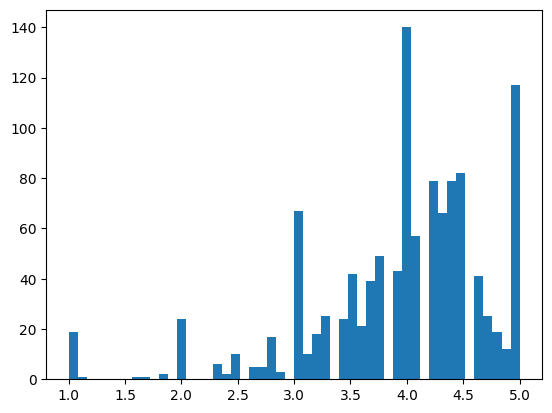

In [ ]:
plt.hist(bars["note"], bins = 50)

In [ ]:
#Avec 5 segments les données sont regroupées en larges catégories donc les variations précises dans les notes ne sont pas visibles.
#Avec 10 segments les tendances des notes deviennent plus claires et des pics éventuels commencent à se distinguer.
#Avec 15 et 20 segments on peut observer des concentrations plus précises de notes
#Avec 50 segments l'histogramme devient très détaillé

In [ ]:
#En général, des pics peuvent être observés pour des notes comme 4.0 ou 4.5 ou 5.0 car ce sont des valeurs souvent choisies par les clients pour évaluer leur satisfaction.

In [ ]:
#A vue de nez un nombre de segments entre 15 et 20 est souvent un bon compromis .

<div class="alert alert-block alert-info">
Q2.2 - Tracer les histogrammes pour les restaurants. La valeur optimale du nombre de segment varie-t-elle ? Comment expliquer votre réponse ?
</div>

(array([  47.,  137.,  618., 1956., 2010.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

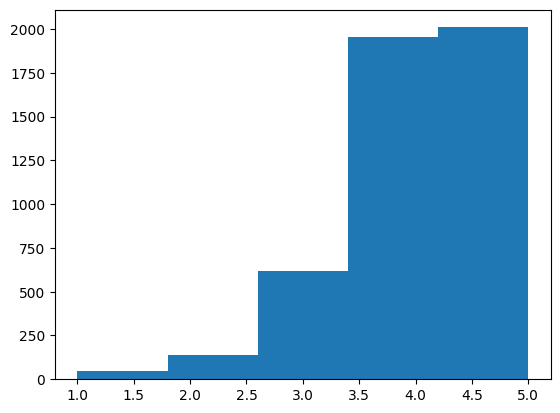

In [ ]:
plt.hist(restos["note"], bins = 5)

(array([  38.,    9.,   50.,   87.,  147.,  471.,  869., 1087., 1341.,
         669.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

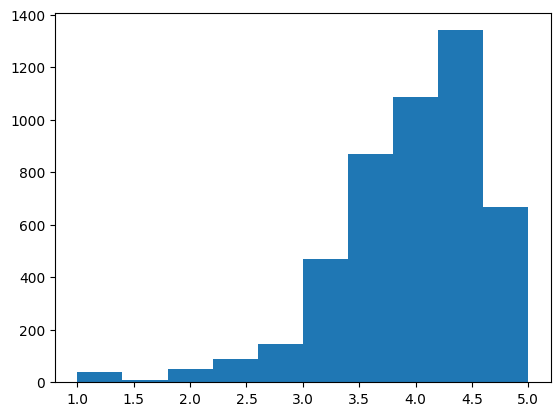

In [ ]:
plt.hist(restos["note"], bins = 10)

(array([  32.,   11.,    4.,   37.,   47.,   53.,  101.,  231.,  176.,
         457.,  807.,  802., 1058.,  589.,  363.]),
 array([1.        , 1.26666667, 1.53333333, 1.8       , 2.06666667,
        2.33333333, 2.6       , 2.86666667, 3.13333333, 3.4       ,
        3.66666667, 3.93333333, 4.2       , 4.46666667, 4.73333333,
        5.        ]),
 <BarContainer object of 15 artists>)

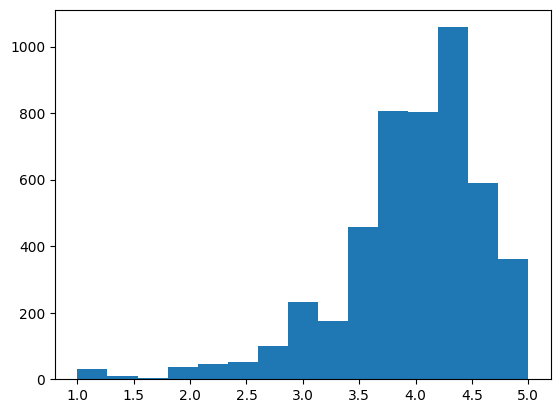

In [ ]:
plt.hist(restos["note"], bins = 15)

(array([ 29.,   9.,   5.,   4.,  16.,  34.,  53.,  34.,  68.,  79., 185.,
        286., 171., 698., 285., 802., 744., 597., 386., 283.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 20 artists>)

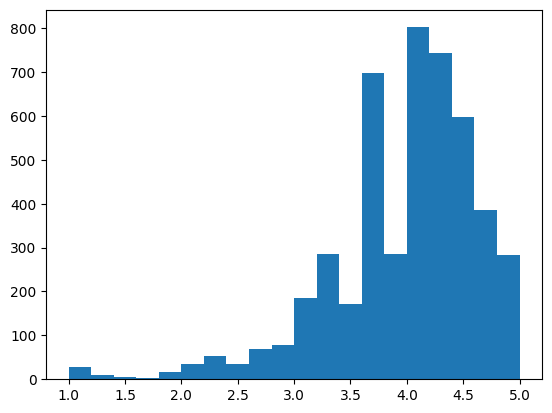

In [ ]:
plt.hist(restos["note"], bins = 20)

(array([ 29.,   0.,   3.,   6.,   0.,   2.,   3.,   2.,   2.,   0.,  11.,
          5.,  21.,  13.,   0.,  17.,  17.,  19.,  34.,   0.,  27.,  41.,
         33.,  46.,   0., 124.,  61.,  81.,  95.,   0., 110., 171., 176.,
        247., 275.,   0., 285., 440., 362.,   0., 379., 365., 314., 283.,
          0., 192., 114.,  80.,  31., 252.]),
 array([1.  , 1.08, 1.16, 1.24, 1.32, 1.4 , 1.48, 1.56, 1.64, 1.72, 1.8 ,
        1.88, 1.96, 2.04, 2.12, 2.2 , 2.28, 2.36, 2.44, 2.52, 2.6 , 2.68,
        2.76, 2.84, 2.92, 3.  , 3.08, 3.16, 3.24, 3.32, 3.4 , 3.48, 3.56,
        3.64, 3.72, 3.8 , 3.88, 3.96, 4.04, 4.12, 4.2 , 4.28, 4.36, 4.44,
        4.52, 4.6 , 4.68, 4.76, 4.84, 4.92, 5.  ]),
 <BarContainer object of 50 artists>)

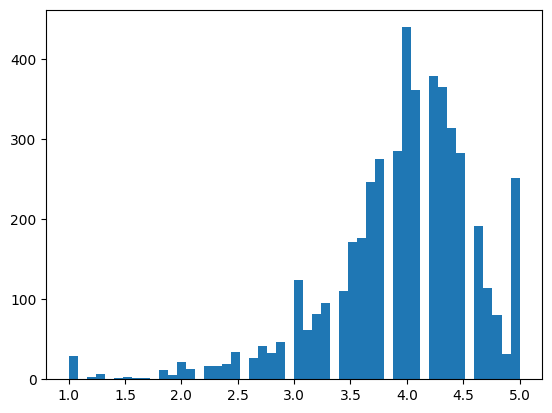

In [ ]:
plt.hist(restos["note"], bins = 50)

In [ ]:
#En général le nombre optimal de segments ne devrait pas beaucoup varier pour les restaurants par rapport aux bars car la distribution des données influence le choix du nombre de segments si les notes des restaurants sont concentrée plus de segments permettent d'observer ces regroupements si les notes sont uniformément réparties moins de segments suffisent.

<div class="alert alert-block alert-info">
Q2.3 - Tracer les histogrammes pour les bars/restaurants. La valeur optimale du nombre de segment varie-t-elle ? Comment expliquer votre réponse ?
</div>

(array([  25.,   60.,  412., 1502., 1241.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

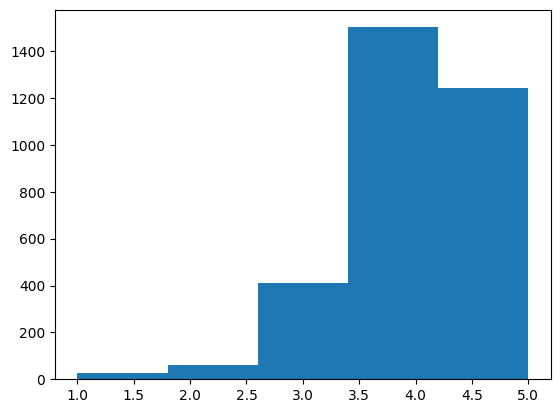

In [ ]:
plt.hist(barestos["note"], bins = 5)

(array([ 20.,   5.,  16.,  44.,  64., 348., 654., 848., 920., 321.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

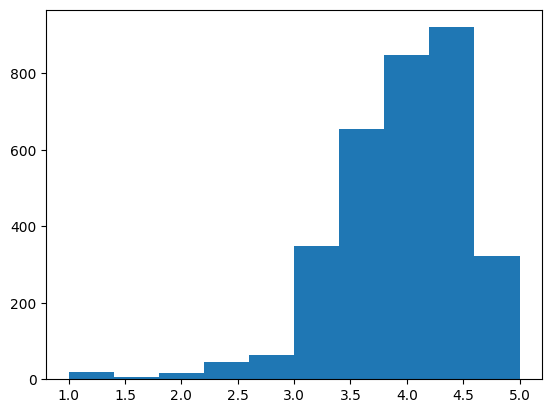

In [ ]:
plt.hist(barestos["note"], bins = 10)

(array([ 20.,   2.,   3.,  16.,  10.,  34.,  50., 140., 136., 373., 593.,
        622., 748., 342., 151.]),
 array([1.        , 1.26666667, 1.53333333, 1.8       , 2.06666667,
        2.33333333, 2.6       , 2.86666667, 3.13333333, 3.4       ,
        3.66666667, 3.93333333, 4.2       , 4.46666667, 4.73333333,
        5.        ]),
 <BarContainer object of 15 artists>)

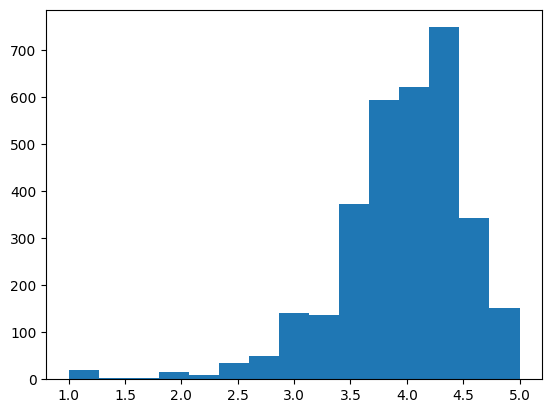

In [ ]:
plt.hist(barestos["note"], bins = 15)

(array([ 19.,   0.,   1.,   0.,   0.,   0.,   2.,   0.,   3.,   0.,   1.,
          2.,  13.,   0.,   0.,   4.,   6.,   5.,  29.,   0.,   8.,  19.,
         23.,  14.,   0.,  89.,  37.,  62.,  74.,   0.,  86., 153., 134.,
        165., 202.,   0., 226., 358., 264.,   0., 295., 247., 206., 172.,
          0., 108.,  62.,  34.,  15., 102.]),
 array([1.  , 1.08, 1.16, 1.24, 1.32, 1.4 , 1.48, 1.56, 1.64, 1.72, 1.8 ,
        1.88, 1.96, 2.04, 2.12, 2.2 , 2.28, 2.36, 2.44, 2.52, 2.6 , 2.68,
        2.76, 2.84, 2.92, 3.  , 3.08, 3.16, 3.24, 3.32, 3.4 , 3.48, 3.56,
        3.64, 3.72, 3.8 , 3.88, 3.96, 4.04, 4.12, 4.2 , 4.28, 4.36, 4.44,
        4.52, 4.6 , 4.68, 4.76, 4.84, 4.92, 5.  ]),
 <BarContainer object of 50 artists>)

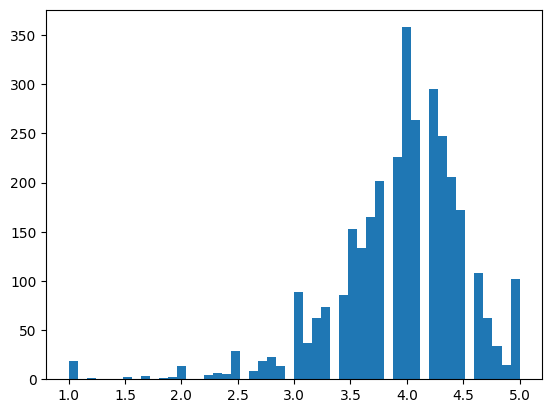

In [ ]:
plt.hist(barestos["note"], bins = 50)

In [ ]:
#Oui la valeur optimale peut varier légèrement les notes des bars/restaurants étant homogènes nécessitent un nombre modéré de segments pour bien représenter les variations.

<div class="alert alert-block alert-warning">
Une représentation graphique très utile pour comparer facilement des valeurs quantitatives est la <a href="https://fr.wikipedia.org/wiki/Bo%C3%AEte_%C3%A0_moustaches">boîte à moustache</a> : la boîte dénote les données comprises entre le 1er et le 3e quartile ($Q_1$ et $Q_3$), le trait représente la médiane, le triangle la moyenne et les deux segments inférieur et supérieur représente les valeurs $Q_1-1,5*IQR$  et $Q_3+1,5*IQR$, avec $IQR=Q_3-Q_1$. La ligne suivante permet de tracer les boîtes pour nos données.
</div>
<div class="alert alert-block alert-info">
Q2.4 - Commenter par rapport aux résultats obtenus.
</div>

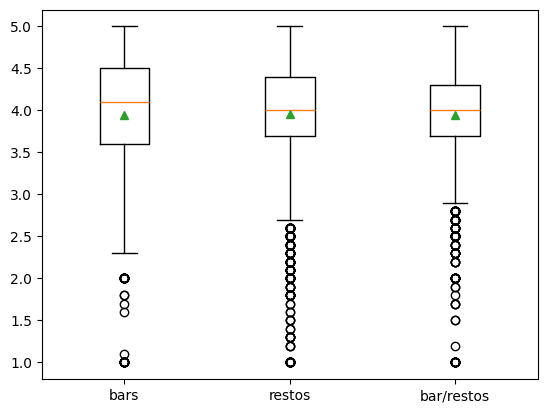

In [ ]:
_ = plt.boxplot([bars['note'], restos['note'], barestos['note']], showmeans = True, labels = ['bars', 'restos', 'bar/restos'])
#Les bars montrent une plus grande dispersion et des valeurs extrêmes les restaurants et bars/restaurants ont des notes plus concentrées avec moins de variabilité et une distribution plus uniforme ces observations confirment les analyses précédentes sur la répartition et l’homogénéité des données.

<div class="alert alert-block alert-warning">
    Une autre représentation graphique pour visualiser la répartition : le <em>violin plot</em>.
</div>

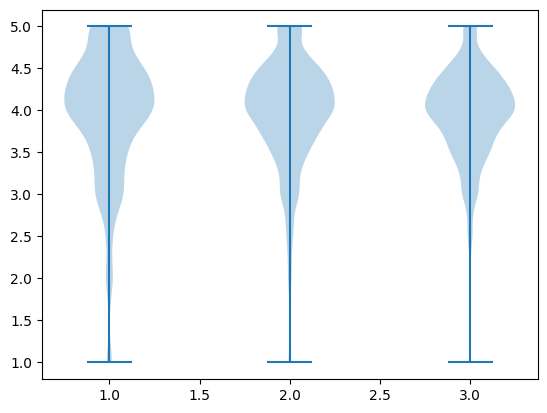

In [ ]:
_ = plt.violinplot([bars['note'], restos['note'], barestos['note']])

# 3 - Analyse géospatiale des notes

<div class="alert alert-block alert-warning">
Dans cette partie, on s'intéresse à analyser s'il y a des différences dans la répartition des notes en fonction de la localisation. Nous allons découper Paris en 4 régions concentriques et étudier dans chacune les statistiques de notes. Afin de simplifier les opérations, nous allons normaliser la longitude et la latitude. Nous allons d'abord étudier les bars puis vous pouvez répéter les opérations pour les restaurants et les bars-restaurants.
</div>

<div class="alert alert-block alert-info">
Q3.1 - Déterminer les bornes max et min des longitudes et latitudes dans les variables <code>longmax</code>, <code>longmin</code>, <code>latmax</code>, <code>latmin</code>.
</div>

In [ ]:
longmax = bars['longitude'].max()
longmin = bars['longitude'].min()
latmax = bars['latitude'].max()
latmin = bars['latitude'].min()

<div class="alert alert-block alert-info">
Q3.2 - Définir deux nouvelles colonnes <code>longnorm</code> et <code>latnorm</code> qui correspondent aux longitudes et latitudes normalisées entre 0 et 1.
</div>

In [ ]:
bars['longnorm'] = (bars['longitude'] - longmin) / (longmax - longmin)
bars['latnorm'] = (bars['latitude'] - latmin) / (latmax - latmin)

<div class="alert alert-block alert-info">
Q3.3 - Définir la colonne <code>dist</code> et y stocker le calcul de la distance entre le lieu et le centre $(0.5,0.5)$.
</div>

In [ ]:
bars['dist'] = np.sqrt((bars['longnorm'] - 0.5)**2 + (bars['latnorm'] - 0.5)**2)

<div class="alert alert-block alert-info">
    Q3.4 - Créer 4 variables <code>bars_gr1</code>, <code>bars_gr2</code>, <code>bars_gr3</code>, <code>bars_gr4</code> qui correspondent aux bars respectivement à une distance de $0.15$ du centre, entre $0.15$ et $0.25$ du centre, entre $0.25$ et $0.4$, et ceux à plus de $0.4$. Regarder la répartition du nombre de bars dans chacune des zones ainsi définies et tracer un scatter plot qui les représentent par groupe.
</div>

In [ ]:
bars_gr1 = bars[bars['dist'] <= 0.15]
bars_gr2 = bars[(bars['dist'] > 0.15) & (bars['dist'] <= 0.25)]
bars_gr3 = bars[(bars['dist'] > 0.25) & (bars['dist'] <= 0.4)]
bars_gr4 = bars[bars['dist'] > 0.4]

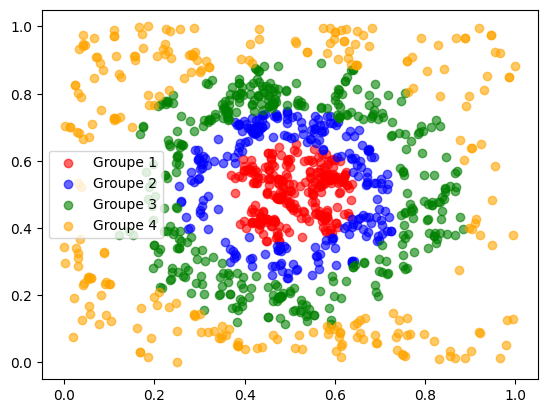

In [ ]:
plt.scatter(bars_gr1['longnorm'], bars_gr1['latnorm'], color='red', alpha=0.6,label='Groupe 1')
plt.scatter(bars_gr2['longnorm'], bars_gr2['latnorm'], color='blue', alpha=0.6,label='Groupe 2')
plt.scatter(bars_gr3['longnorm'], bars_gr3['latnorm'], color='green', alpha=0.6,label='Groupe 3')
plt.scatter(bars_gr4['longnorm'], bars_gr4['latnorm'], color='orange', alpha=0.6,label='Groupe 4')
plt.legend()

<div class="alert alert-block alert-info">
Q3.5 - Calculer les moyennes, écarts-types et les médianes des notes dans chacune des zones. Remarquez-vous des différences ?
</div>

In [ ]:
moy1=bars_gr1["note"].mean()
ecar1=bars_gr1["note"].std()
med1=bars_gr1["note"].median()
moy2=bars_gr2["note"].mean()
ecar2=bars_gr2["note"].std()
med2=bars_gr2["note"].median()
moy3=bars_gr3["note"].mean()
ecar3=bars_gr3["note"].std()
med3=bars_gr3["note"].median()
moy4=bars_gr4["note"].mean()
ecar4=bars_gr4["note"].std()
med4=bars_gr4["note"].median()
print([moy1,ecar1,med1])
print([moy2,ecar2,med2])
print([moy3,ecar3,med3])
print([moy4,ecar4,med4])


[3.9955223880597015, 0.6288168155447805, 4.1]
[3.955186721991701, 0.8063705119172117, 4.1]
[3.97742782152231, 0.8377694056322421, 4.1]
[3.8448275862068964, 0.8506231137804874, 4.0]


In [ ]:
#grp1 les bars situés très près du centre pourraient avoir des notes légèrement meilleures en moyenne
#grp4 les bars plus éloignés peuvent avoir des moyennes légèrement inférieures ou des dispersions plus élevées
#Si les moyennes et médianes des notes sont similaires entre les groupes cela montre une homogénéité des notes dans toutes les zones.

<div class="alert alert-block alert-info">
Q3.6 - Tracer les histogrammes et les boîtes à moustaches des notes dans chacune des zones. Remarquez-vous des différences ?
</div>

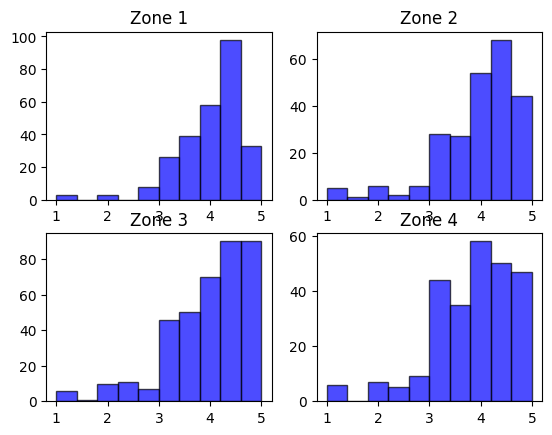

In [ ]:
zones = [bars_gr1, bars_gr2, bars_gr3, bars_gr4]
for i, zone in enumerate(zones):
  plt.subplot(2, 2, i + 1)
  plt.hist(zone["note"], bins=10, color="blue", edgecolor="black", alpha=0.7)
  plt.title(f"Zone {i + 1}")
plt.show()

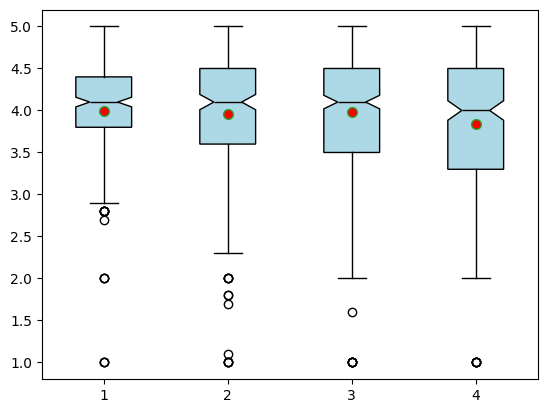

In [ ]:
data = [bars_gr1["note"], bars_gr2["note"], bars_gr3["note"], bars_gr4["note"]]
plt.boxplot(data, showmeans=True, notch=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            meanprops=dict(marker='o', markerfacecolor='red', markersize=7),
            medianprops=dict(color='black'))
plt.show()

In [ ]:
#En observant les histogrammes on peut vérifier si la répartition des notes change selon les zones.

In [ ]:
#Avec les boîtes à moustaches on peut comparer les médianes et la dispersion des notes

In [ ]:
#Si une zone a des moustaches plus longues ou une dispersion plus large cela indique une plus grande variabilité dans les notes.

<div class="alert alert-block alert-info">
3.7 - Faire de même avec les restaurants et les restaurants/bars.
</div>

In [ ]:
longmax = restos['longitude'].max()
longmin = restos['longitude'].min()
latmax = restos['latitude'].max()
latmin = restos['latitude'].min()

In [ ]:
restos['longnorm'] = (restos['longitude'] - longmin) / (longmax - longmin)
restos['latnorm'] = (restos['latitude'] - latmin) / (latmax - latmin)

In [ ]:
restos['dist'] = np.sqrt((restos['longnorm'] - 0.5)**2 + (restos['latnorm'] - 0.5)**2)

In [ ]:
restos_gr1 = restos[restos['dist'] <= 0.15]
restos_gr2 = restos[(restos['dist'] > 0.15) & (restos['dist'] <= 0.25)]
restos_gr3 = restos[(restos['dist'] > 0.25) & (restos['dist'] <= 0.4)]
restos_gr4 = restos[restos['dist'] > 0.4]

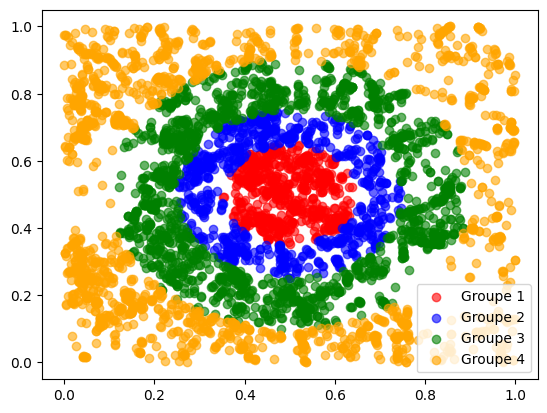

In [ ]:
plt.scatter(restos_gr1['longnorm'], restos_gr1['latnorm'], color='red', alpha=0.6,label='Groupe 1')
plt.scatter(restos_gr2['longnorm'], restos_gr2['latnorm'], color='blue', alpha=0.6,label='Groupe 2')
plt.scatter(restos_gr3['longnorm'], restos_gr3['latnorm'], color='green', alpha=0.6,label='Groupe 3')
plt.scatter(restos_gr4['longnorm'], restos_gr4['latnorm'], color='orange', alpha=0.6,label='Groupe 4')
plt.legend()

In [ ]:
moy1=restos_gr1["note"].mean()
ecar1=restos_gr1["note"].std()
med1=restos_gr1["note"].median()
moy2=restos_gr2["note"].mean()
ecar2=restos_gr2["note"].std()
med2=restos_gr2["note"].median()
moy3=restos_gr3["note"].mean()
ecar3=restos_gr3["note"].std()
med3=restos_gr3["note"].median()
moy4=restos_gr4["note"].mean()
ecar4=restos_gr4["note"].std()
med4=restos_gr4["note"].median()
print([moy1,ecar1,med1])
print([moy2,ecar2,med2])
print([moy3,ecar3,med3])
print([moy4,ecar4,med4])

[3.990630048465267, 0.5071106909561623, 4.0]
[3.916983523447402, 0.6402454526007135, 4.0]
[3.9702409638554217, 0.6495372784364544, 4.1]
[3.9418823529411764, 0.7251140952501348, 4.0]


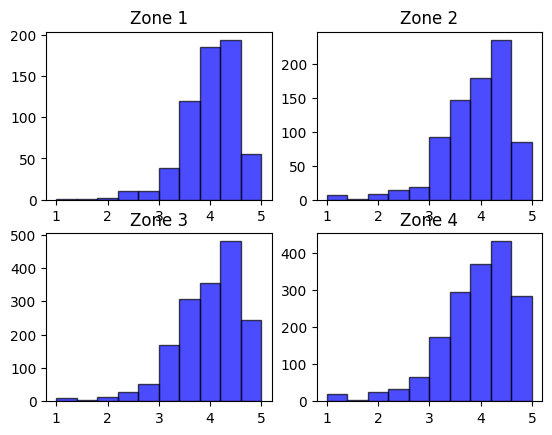

In [ ]:
zones = [restos_gr1, restos_gr2, restos_gr3, restos_gr4]
for i, zone in enumerate(zones):
  plt.subplot(2, 2, i + 1)
  plt.hist(zone["note"], bins=10, color="blue", edgecolor="black", alpha=0.7)
  plt.title(f"Zone {i + 1}")
plt.show()

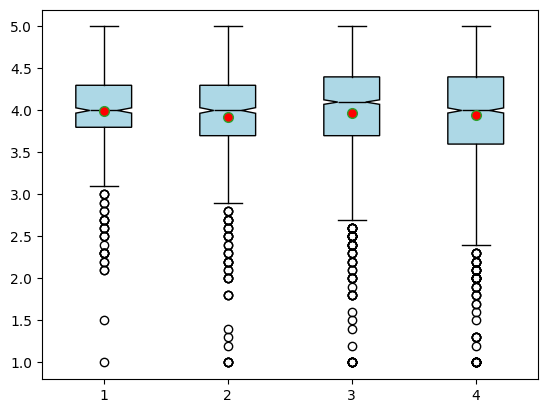

In [ ]:
data = [restos_gr1["note"], restos_gr2["note"], restos_gr3["note"], restos_gr4["note"]]
plt.boxplot(data, showmeans=True, notch=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            meanprops=dict(marker='o', markerfacecolor='red', markersize=7),
            medianprops=dict(color='black'))
plt.show()

In [ ]:
longmax = barestos['longitude'].max()
longmin = barestos['longitude'].min()
latmax = barestos['latitude'].max()
latmin = barestos['latitude'].min()

In [ ]:
barestos['longnorm'] = (barestos['longitude'] - longmin) / (longmax - longmin)
barestos['latnorm'] = (barestos['latitude'] - latmin) / (latmax - latmin)

In [ ]:
barestos['dist'] = np.sqrt((barestos['longnorm'] - 0.5)**2 + (barestos['latnorm'] - 0.5)**2)

In [ ]:
barestos_gr1 = barestos[barestos['dist'] <= 0.15]
barestos_gr2 = barestos[(barestos['dist'] > 0.15) & (barestos['dist'] <= 0.25)]
barestos_gr3 = barestos[(barestos['dist'] > 0.25) & (barestos['dist'] <= 0.4)]
barestos_gr4 = barestos[barestos['dist'] > 0.4]

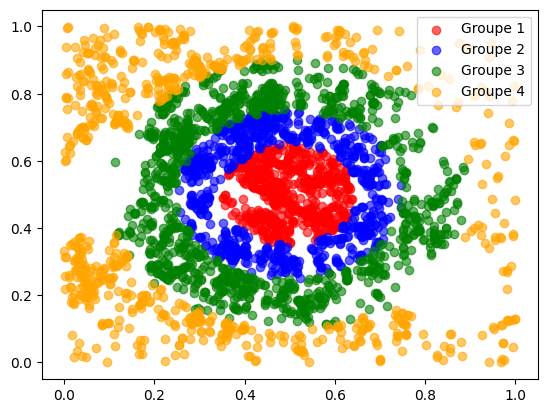

In [ ]:
plt.scatter(barestos_gr1['longnorm'], barestos_gr1['latnorm'], color='red', alpha=0.6,label='Groupe 1')
plt.scatter(barestos_gr2['longnorm'], barestos_gr2['latnorm'], color='blue', alpha=0.6,label='Groupe 2')
plt.scatter(barestos_gr3['longnorm'], barestos_gr3['latnorm'], color='green', alpha=0.6,label='Groupe 3')
plt.scatter(barestos_gr4['longnorm'], barestos_gr4['latnorm'], color='orange', alpha=0.6,label='Groupe 4')
plt.legend()

In [ ]:
moy1=barestos_gr1["note"].mean()
ecar1=barestos_gr1["note"].std()
med1=barestos_gr1["note"].median()
moy2=barestos_gr2["note"].mean()
ecar2=barestos_gr2["note"].std()
med2=barestos_gr2["note"].median()
moy3=barestos_gr3["note"].mean()
ecar3=barestos_gr3["note"].std()
med3=barestos_gr3["note"].median()
moy4=barestos_gr4["note"].mean()
ecar4=barestos_gr4["note"].std()
med4=barestos_gr4["note"].median()
print([moy1,ecar1,med1])
print([moy2,ecar2,med2])
print([moy3,ecar3,med3])
print([moy4,ecar4,med4])

[3.950891410048622, 0.45441915566273866, 4.0]
[3.970104438642298, 0.5376606209558955, 4.0]
[3.957374100719425, 0.6160320841397453, 4.0]
[3.878657718120806, 0.6583731351634879, 4.0]


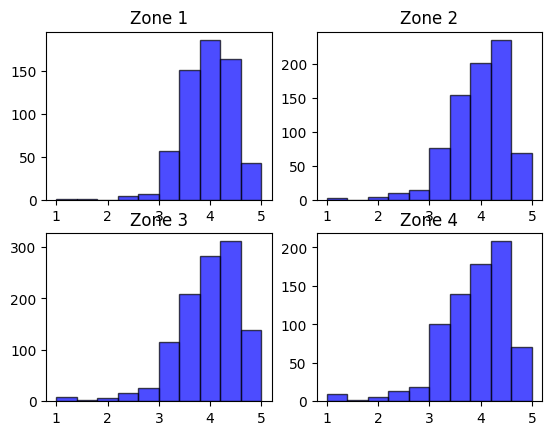

In [ ]:
zones = [barestos_gr1, barestos_gr2, barestos_gr3, barestos_gr4]
for i, zone in enumerate(zones):
  plt.subplot(2, 2, i + 1)
  plt.hist(zone["note"], bins=10, color="blue", edgecolor="black", alpha=0.7)
  plt.title(f"Zone {i + 1}")
plt.show()

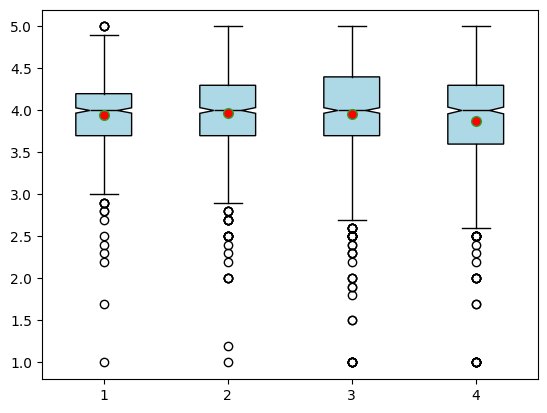

In [ ]:
data = [barestos_gr1["note"], barestos_gr2["note"], barestos_gr3["note"], barestos_gr4["note"]]
plt.boxplot(data, showmeans=True, notch=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            meanprops=dict(marker='o', markerfacecolor='red', markersize=7),
            medianprops=dict(color='black'))
plt.show()

# Partie II - Histogrammes

<div class="alert alert-block alert-warning">
Nous allons reprendre l'isolation faite dans la partie précédente en séparant dans des variables `bars`,`restos` et `barestos` les lieux correspondants respectivement à des bars seul, des restaurants seul et des bars-restaurants, qui ont une note existante.
</div>

# 1 - Simulation et histogrammes

<div class="alert alert-block alert-warning">
Afin de mieux comprendre l'estimation par histogramme (et les pièges possibles), nous allons étudier dans un premier temps des données simulés. La fonction <code>np.random.uniform(size = N)</code> permet de tirer uniformément dans $[0,1[$ un échantillon de taille <code>N</code>.
</div>

<div class="alert alert-block alert-info">
    Q1.1 - Tirer un échantillon <code>ech50</code> de taille 50 et faire un histogramme des valeurs obtenues en utilisant 2, 5, 10 et 20 segments.
</div>

(array([27., 23.]),
 array([0.00259644, 0.45125285, 0.89990926]),
 <BarContainer object of 2 artists>)

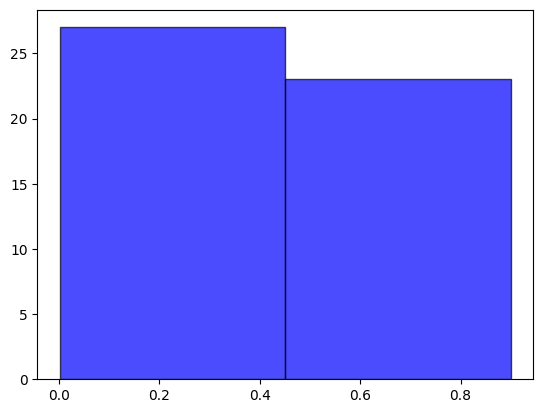

In [ ]:
ech50 = np.random.uniform(size=50)
plt.hist(ech50, bins=2, color="blue", edgecolor="black", alpha=0.7)



(array([ 9.,  9., 11., 12.,  9.]),
 array([0.00548828, 0.19701363, 0.38853898, 0.58006433, 0.77158968,
        0.96311503]),
 <BarContainer object of 5 artists>)

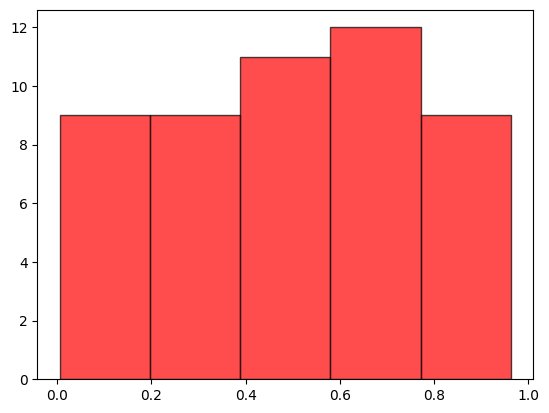

In [ ]:
plt.hist(ech50, bins=5, color="red", edgecolor="black", alpha=0.7)

(array([9., 6., 3., 5., 4., 9., 5., 1., 3., 5.]),
 array([0.00259644, 0.09232772, 0.182059  , 0.27179028, 0.36152157,
        0.45125285, 0.54098413, 0.63071541, 0.7204467 , 0.81017798,
        0.89990926]),
 <BarContainer object of 10 artists>)

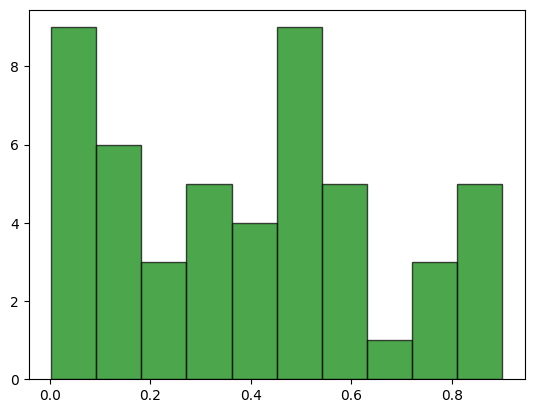

In [ ]:
plt.hist(ech50, bins=10, color="green", edgecolor="black", alpha=0.7)

(array([6., 3., 4., 2., 2., 1., 4., 1., 1., 3., 5., 4., 5., 0., 1., 0., 2.,
        1., 1., 4.]),
 array([0.00259644, 0.04746208, 0.09232772, 0.13719336, 0.182059  ,
        0.22692464, 0.27179028, 0.31665592, 0.36152157, 0.40638721,
        0.45125285, 0.49611849, 0.54098413, 0.58584977, 0.63071541,
        0.67558106, 0.7204467 , 0.76531234, 0.81017798, 0.85504362,
        0.89990926]),
 <BarContainer object of 20 artists>)

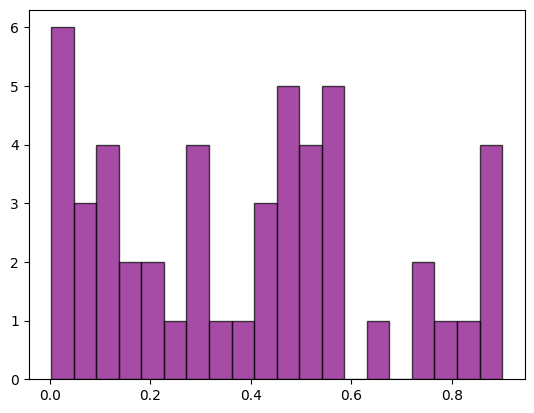

In [ ]:
plt.hist(ech50, bins=20, color="purple", edgecolor="black", alpha=0.7)

<div class="alert alert-block alert-info">
Q1.2 - Tirer un échantillon <code>ech100</code> de taille 100 et faire un histogramme des valeurs obtenues en utilisant 2, 5, 10 et 20 segments.
</div>

(array([51., 49.]),
 array([0.00969479, 0.50402996, 0.99836512]),
 <BarContainer object of 2 artists>)

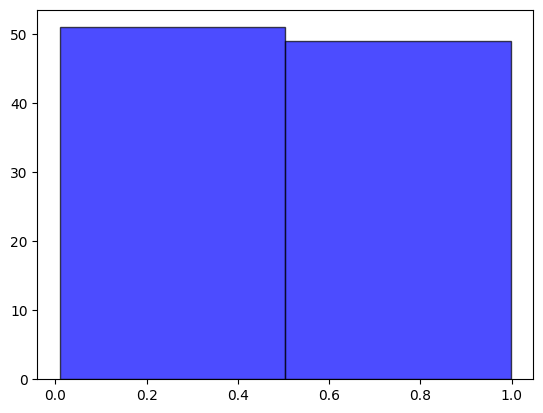

In [ ]:
ech100=np.random.uniform(size=100)
plt.hist(ech100, bins=2, color="blue", edgecolor="black", alpha=0.7)

(array([20., 25., 21., 14., 20.]),
 array([0.0070995 , 0.20434498, 0.40159046, 0.59883594, 0.79608141,
        0.99332689]),
 <BarContainer object of 5 artists>)

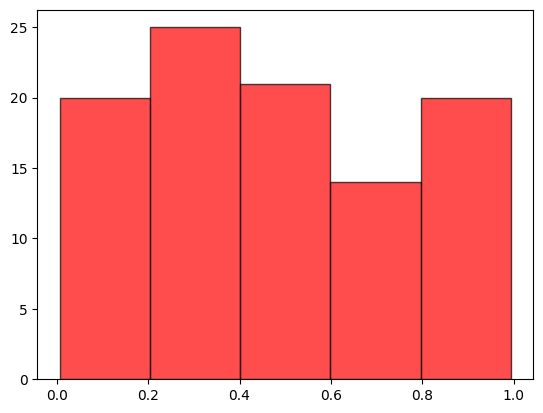

In [ ]:
plt.hist(ech100, bins=5, color="red", edgecolor="black", alpha=0.7)

(array([13.,  7., 12., 13., 11., 10., 10.,  4., 10., 10.]),
 array([0.0070995 , 0.10572224, 0.20434498, 0.30296772, 0.40159046,
        0.5002132 , 0.59883594, 0.69745867, 0.79608141, 0.89470415,
        0.99332689]),
 <BarContainer object of 10 artists>)

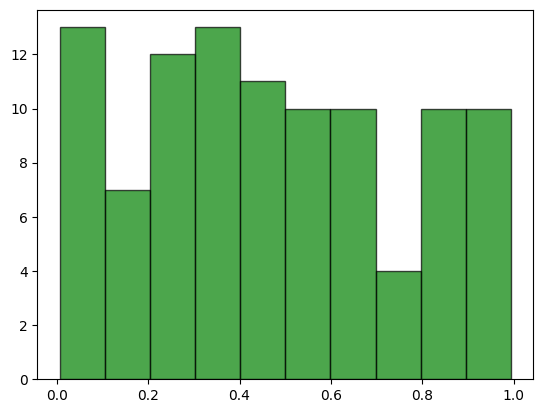

In [ ]:
plt.hist(ech100, bins=10, color="green", edgecolor="black", alpha=0.7)

(array([6., 7., 3., 4., 5., 7., 4., 9., 6., 5., 6., 4., 4., 6., 0., 4., 7.,
        3., 4., 6.]),
 array([0.0070995 , 0.05641087, 0.10572224, 0.15503361, 0.20434498,
        0.25365635, 0.30296772, 0.35227909, 0.40159046, 0.45090183,
        0.5002132 , 0.54952457, 0.59883594, 0.6481473 , 0.69745867,
        0.74677004, 0.79608141, 0.84539278, 0.89470415, 0.94401552,
        0.99332689]),
 <BarContainer object of 20 artists>)

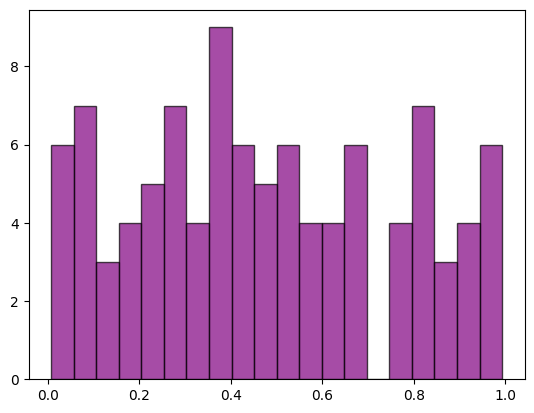

In [ ]:
plt.hist(ech100, bins=20, color="purple", edgecolor="black", alpha=0.7)

<div class="alert alert-block alert-info">
Q1.3 - Tirer un échantillon <code>ech1000</code> de taille 1000 et faire un histogramme des valeurs obtenues en utilisant 2, 5, 10 et 20 segments.
</div>

(array([483., 517.]),
 array([5.47882061e-04, 4.98895976e-01, 9.97244071e-01]),
 <BarContainer object of 2 artists>)

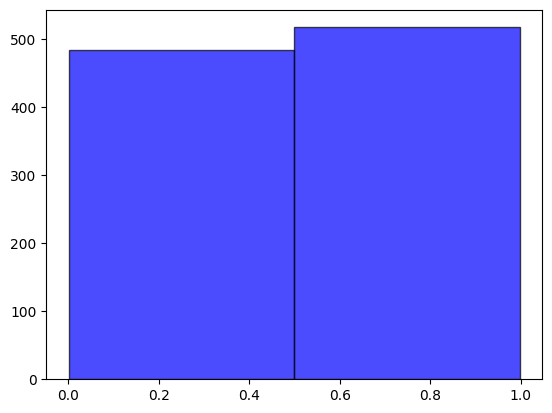

In [ ]:
ech1000=np.random.uniform(size=1000)
plt.hist(ech1000, bins=2, color="blue", edgecolor="black", alpha=0.7)

(array([215., 179., 193., 210., 203.]),
 array([1.44459793e-04, 1.99798088e-01, 3.99451716e-01, 5.99105345e-01,
        7.98758973e-01, 9.98412601e-01]),
 <BarContainer object of 5 artists>)

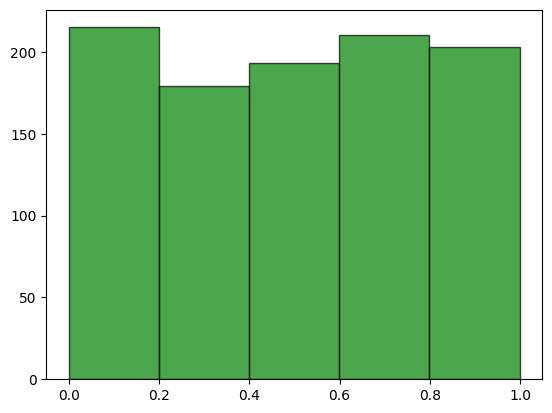

In [ ]:
plt.hist(ech1000, bins=5, color="green", edgecolor="black", alpha=0.7)

(array([103., 112.,  89.,  90.,  89., 104.,  91., 119.,  97., 106.]),
 array([1.44459793e-04, 9.99712739e-02, 1.99798088e-01, 2.99624902e-01,
        3.99451716e-01, 4.99278530e-01, 5.99105345e-01, 6.98932159e-01,
        7.98758973e-01, 8.98585787e-01, 9.98412601e-01]),
 <BarContainer object of 10 artists>)

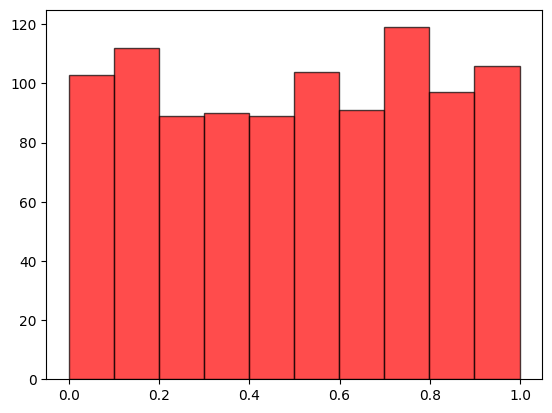

In [ ]:
plt.hist(ech1000, bins=10, color="red", edgecolor="black", alpha=0.7)

(array([54., 49., 53., 59., 39., 50., 43., 47., 54., 35., 47., 57., 47.,
        44., 64., 55., 44., 53., 54., 52.]),
 array([1.44459793e-04, 5.00578669e-02, 9.99712739e-02, 1.49884681e-01,
        1.99798088e-01, 2.49711495e-01, 2.99624902e-01, 3.49538309e-01,
        3.99451716e-01, 4.49365123e-01, 4.99278530e-01, 5.49191937e-01,
        5.99105345e-01, 6.49018752e-01, 6.98932159e-01, 7.48845566e-01,
        7.98758973e-01, 8.48672380e-01, 8.98585787e-01, 9.48499194e-01,
        9.98412601e-01]),
 <BarContainer object of 20 artists>)

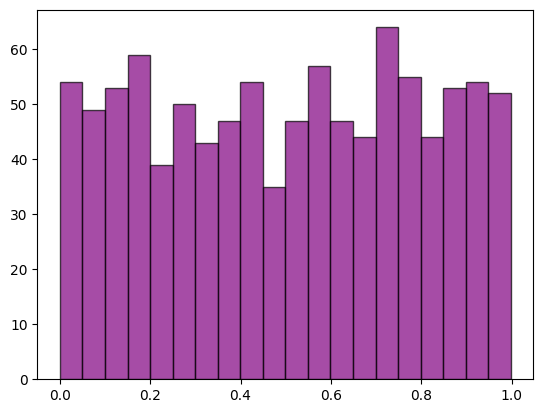

In [ ]:
plt.hist(ech1000, bins=20, color="purple", edgecolor="black", alpha=0.7)

<div class="alert alert-block alert-info">
Q1.4 - Comparer les trois résultats. Quel est le nombre de segments optimaux pour $N=50$ ? Pour $N=1000$ ? Comment évolue ce nombre en fonction de la taille de l'échantillon ?
</div>

In [ ]:
#Taille 50 : les histogrammes avec 5 à 10 segments sont clairs et stables avec 20 segments les fluctuations dues au faible nombre de données deviennent visibles.

In [ ]:
#Taille 100 : les histogrammes avec 10 segments équilibrent détail et lisibilité avec 20 segments des variations peu significatives peuvent apparaître.
#Taille 1000 : avec 20 segments les détails sont bien représentés sans bruit notable mais 2 ou 5 segments masquent des subtilités importantes.

In [ ]:
#Pour N=50 entre 5 et 10 segments
#Pour N=1000 entre 15 et 20 segments

In [ ]:
#Le nombre de segments augmente avec la taille de l'échantillon pour mieux capturer les détails suivant une règle empirique proche de racine de N

# 2 - Histogramme 2D

<div class="alert alert-block alert-warning">
On peut généraliser les histogrammes à des dimensions supérieures, en particulier dans le cas de dimension 2.
    La fonction <code>plt.hist2D(dataX, dataY, bins = N)</code> permet de construire l'histogramme  des points en 2 dimensions dont la liste des abscisses est passée dans <code>dataX</code> et la liste des ordonnées dans <code>dataY</code>. Vous pouvez connaître l'échelle des couleurs en rajoutant juste après l'instruction <code>plt.colorbar()</code>.
La fonction retourne 4 valeurs : le tableau du nombre d'échantillons dans chaque case, les bornes des cases des abscisses, les bornes des cases des ordonnées, et la figure.
</div>

<div class="alert alert-block alert-info">
    Q2.1 - En utilisant toujours <code>np.random.uniform()</code>, tirer un échantillon de 50 points 2D  en stockant les abscisses dans <code>echX50</code> et les ordonnées dans <code>echY50</code>. Faire les histogrammes 2D avec 2, 5, 10 et 50 segments par axe. Répéter l'expérience avec $100$ puis $1000$ points.

Que remarquez vous dans ce cas 2D sur le rapport entre taille de l'échantillon et nombre de segments ? À votre avis, que se passe-t-il lorsqu'on augment encore la dimension ?
</div>

<div class="alert alert-block alert-info">
    Q2.2 - Faire les histogrammes 2D avec 2, 5, 10 et 50 segments par axe.
</div>

<div class="alert alert-block alert-info">
    Q2.3 - Répéter l'expérience avec $100$ puis $1000$ points.

Que remarquez vous dans ce cas 2D sur le rapport entre taille de l'échantillon et nombre de segments ? À votre avis, que se passe-t-il lorsqu'on augment encore la dimension ?
</div>

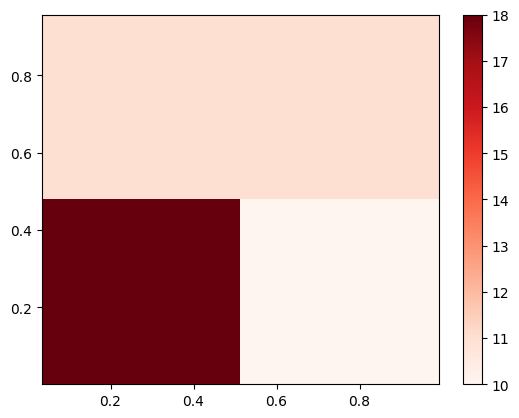

In [ ]:
echX50 = np.random.uniform(size=50)
echY50 = np.random.uniform(size=50)
plt.hist2d(echX50, echY50, bins=2, cmap='Reds')
plt.colorbar()

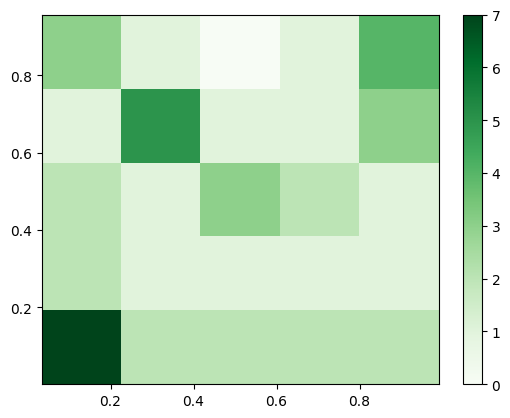

In [ ]:
plt.hist2d(echX50, echY50, bins=5, cmap='Greens')
plt.colorbar()

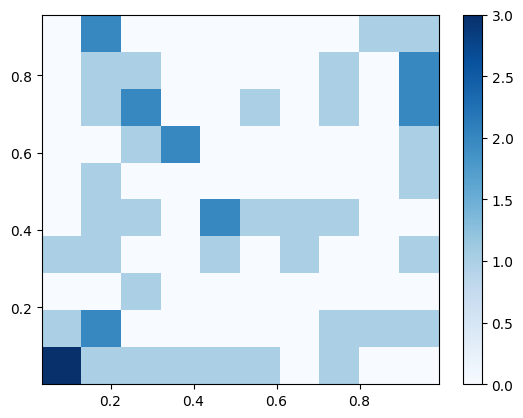

In [ ]:
plt.hist2d(echX50, echY50, bins=10, cmap='Blues')
plt.colorbar()

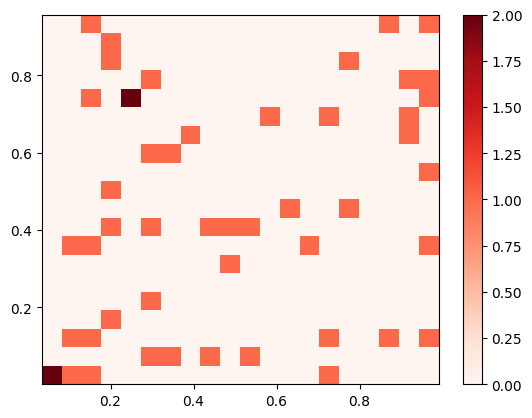

In [ ]:
plt.hist2d(echX50, echY50, bins=20, cmap='Reds')
plt.colorbar()

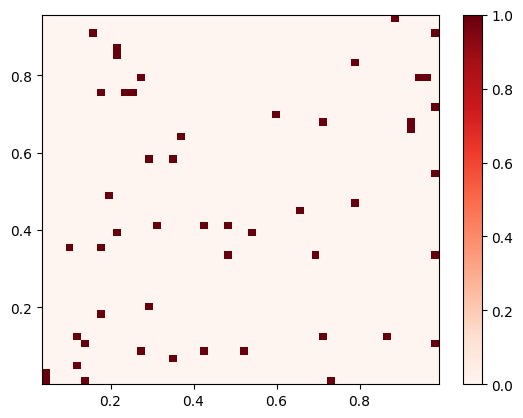

In [ ]:
plt.hist2d(echX50, echY50, bins=50, cmap='Reds')
plt.colorbar()

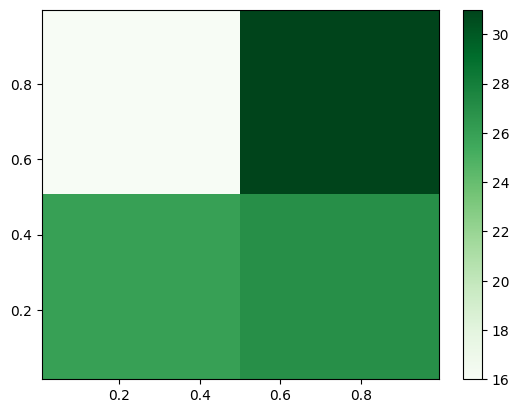

In [ ]:
echX100 = np.random.uniform(size=100)
echY100 = np.random.uniform(size=100)
plt.hist2d(echX100, echY100, bins=2, cmap='Greens')
plt.colorbar()

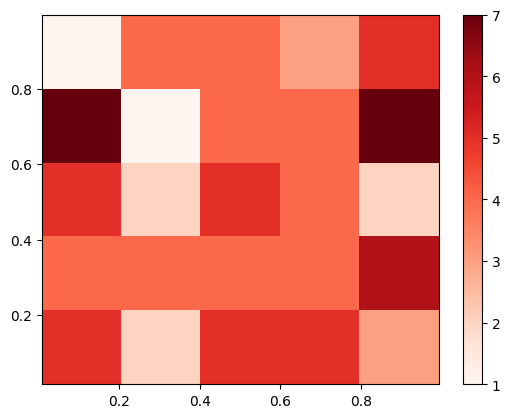

In [ ]:
plt.hist2d(echX100, echY100, bins=5, cmap='Reds')
plt.colorbar()

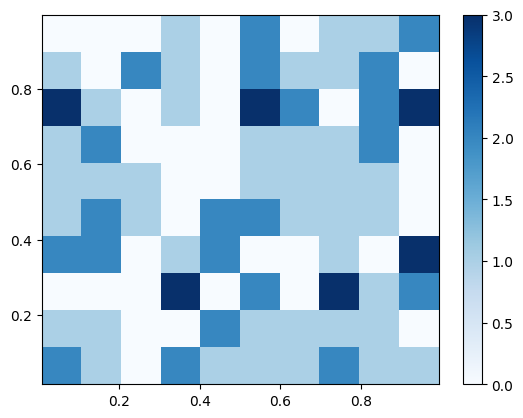

In [ ]:
plt.hist2d(echX100, echY100, bins=10, cmap='Blues')
plt.colorbar()

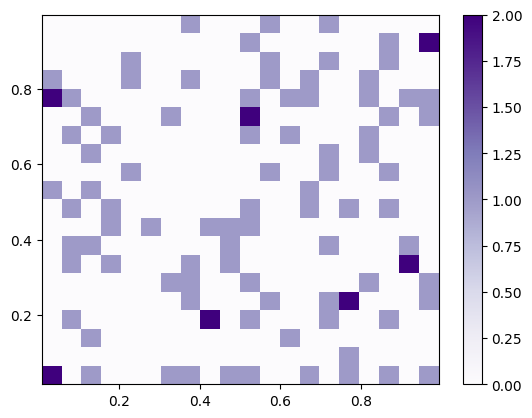

In [ ]:
plt.hist2d(echX100, echY100, bins=20, cmap='Purples')
plt.colorbar()

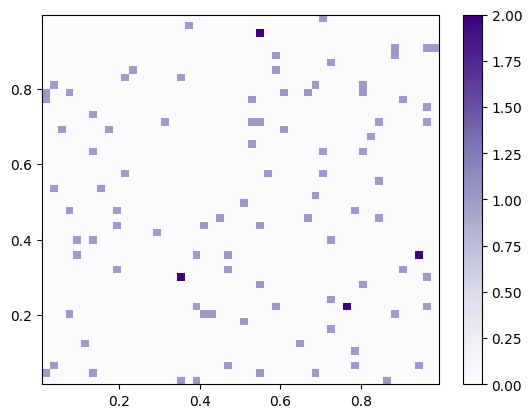

In [ ]:
plt.hist2d(echX100, echY100, bins=50, cmap='Purples')
plt.colorbar()

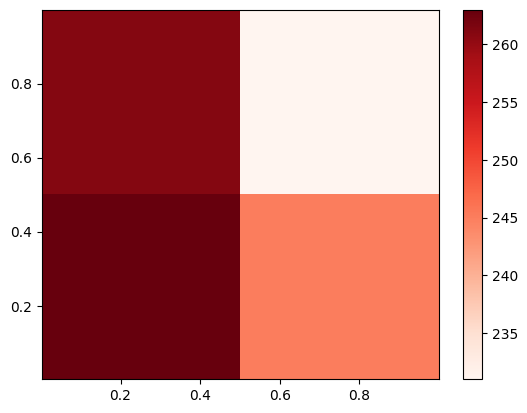

In [ ]:
echX1000 = np.random.uniform(size=1000)
echY1000 = np.random.uniform(size=1000)
plt.hist2d(echX1000, echY1000, bins=2, cmap='Reds')
plt.colorbar()

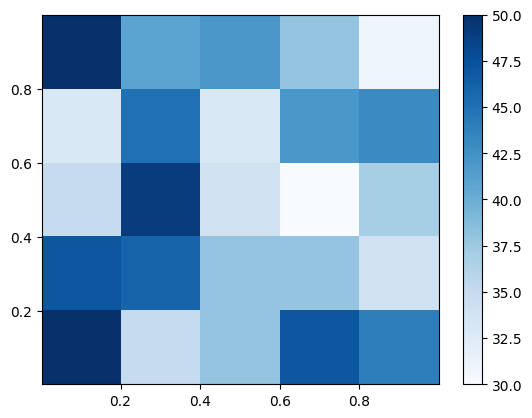

In [ ]:
plt.hist2d(echX1000, echY1000, bins=5, cmap='Blues')
plt.colorbar()

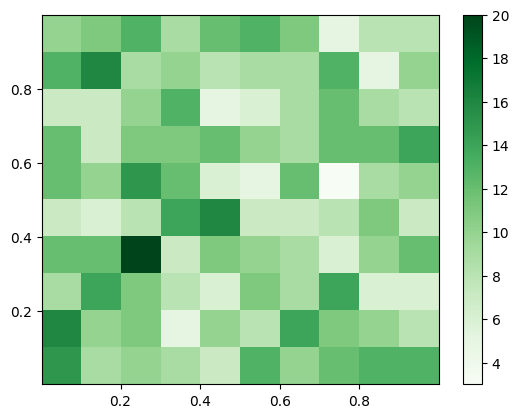

In [ ]:
plt.hist2d(echX1000, echY1000, bins=10, cmap='Greens')
plt.colorbar()

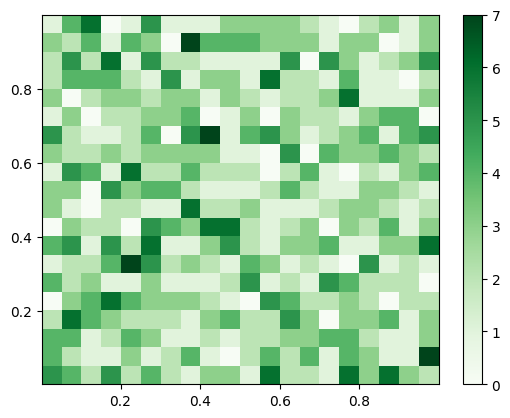

In [ ]:
plt.hist2d(echX1000, echY1000, bins=20, cmap='Greens')
plt.colorbar()

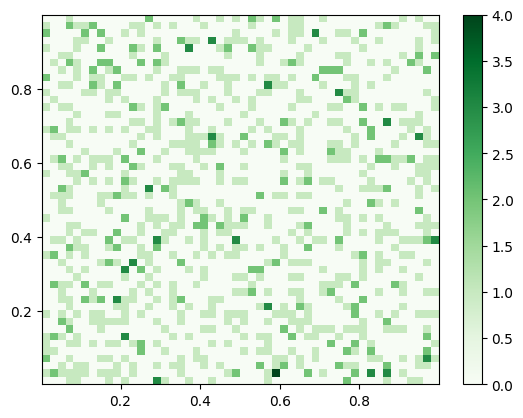

In [ ]:
plt.hist2d(echX1000, echY1000, bins=50, cmap='Greens')
plt.colorbar()

In [ ]:
#50 points : Avec 50 segments trop de cases vides peu significatif.
#100 points : Plus de segments capturent des détails mais des cases vides persistent.
#1000 points : 50 segments deviennent utiles pour plus de subtilités.

In [ ]:
#Plus de dimensions augmentent exponentiellement les cases nécessitant plus de données pour éviter des zones vides

# 3 - Histogramme 2D et analyse géospatiale

<div class="alert alert-block alert-warning">
L'objectif de cette partie est de proposer une analyse plus fine de la répartition des lieux et des notes dans l'espace parisien que celle faite dans le précédent TME. Pour cela, nous allons discrétiser l'espace en une grille de cases selon un découpage linéaire de la latitude et de la longitude. Les cases de la grille peuvent être vu comme une variable qualitative d'indication géographique. Cette grille sera calculée par un histogramme en 2 dimensions.
</div>

<div class="alert alert-block alert-info">
Exécuter le bloc suivant pour charger le tableau des données sur les points d'intérêt parisiens
</div>

In [ ]:
# Chargement du fichier de données
lien = "https://drive.google.com/uc?id=1dMEwdsvkQ84SQE4tcVjyqg_BBZLZmMLW&export=download"
tableau_poi = pd.read_csv(lien)

In [ ]:
tableau_poi


,nom,latitude,longitude,note,prix,furniture_store,laundry,bakery,cafe,home_goods_store,clothing_store,atm,lodging,night_club,convenience_store,restaurant,bar
0,Unopiu,48.866632,2.331637,2.2,-1,1,0,0,0,1,0,0,0,0,0,0,0
1,Olivier Hutzemakers,48.903289,2.339881,-1.0,-1,1,0,0,0,1,0,0,0,0,0,0,0
2,Téodor,48.847633,2.375378,-1.0,-1,1,0,0,0,1,0,0,0,0,0,0,0
3,Féau and Co.,48.879841,2.297154,5.0,-1,1,0,0,0,1,0,0,0,0,0,0,0
4,Patoux Florence Marie-therese,48.827933,2.309074,-1.0,-1,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31847,Le Rallye Bar,48.858395,2.425150,-1.0,-1,0,0,0,0,0,0,0,0,0,0,0,1
31848,lotus de chine,48.914816,2.382295,-1.0,-1,0,0,0,0,0,0,0,0,0,0,0,1
31849,King George,48.874817,2.341561,4.1,-1,0,0,0,0,0,0,0,0,0,0,1,1
31850,Le Révérend,48.914967,2.286391,4.5,-1,0,0,0,0,0,0,0,0,0,0,0,1


<div class="alert alert-block alert-info">
Q3.1.a - Définir une variable <code>bars</code> ne contenant que les lieux qui sont des bars, ne sont pas des restaurants et ont une note attribuée.
</div>

In [ ]:
bars = tableau_poi[(tableau_poi["bar"] == 1) & (tableau_poi["restaurant"] == 0) & (tableau_poi["note"] != -1)]

<div class="alert alert-block alert-info">
Q3.1.b - Définir une variable <code>restos</code> ne contenant que les lieux qui sont des restaurants, ne sont pas des bars et ont une note attribuée.
</div>

In [ ]:
restos = tableau_poi[(tableau_poi["restaurant"] == 1) & (tableau_poi["bar"] == 0) & (tableau_poi["note"] != -1)]

<div class="alert alert-block alert-info">
Q3.1.c - Définir une variable <code>barestos</code> ne contenant que les lieux qui sont à la fois des restaurants et des bars et ont une note attribuée.
</div>

In [ ]:
barestos = tableau_poi[(tableau_poi["restaurant"] == 1) & (tableau_poi["bar"] == 1) & (tableau_poi["note"] != -1)]

<div class="alert alert-block alert-warning">
Comme nous allons utiliser différentes données (bars, restaurants) pour faire des histogrammes et que les limites spatiales (longitudes/latitudes maximales et minimales) ne sont pas forcément les mêmes entre chaque jeu de données, il est nécessaire dans un premier temps de définir ces limites et d'utiliser le paramètre `range` de la fonction ̀`hist2d` pour délimiter la région géographique étudiée en lui passant ces variables.
</div>

<div class="alert alert-block alert-info">
    Q3.2 - Enregistrer dans les variables <code>lomin, lomax, latmin, latmax</code> les longitudes et latitudes minimales/maximales des lieux du tableau <code>tableau_poi</code>.
</div>

In [ ]:
lomax = tableau_poi['longitude'].max()
lomin = tableau_poi['longitude'].min()
latmax = tableau_poi['latitude'].max()
latmin = tableau_poi['latitude'].min()

<div class="alert alert-block alert-info">
Q3.3 - Tracer l'histogramme 2D de la répartition des bars en utilisant un nombre de segment de 20. Enregistrer le tableau résultant dans une variable <code>bars_h</code>.
    
Enregistrer également les bornes des longitudes et latitudes associées à l'histogramme dans les variables <code>long</code> et <code>lat</code>.
</div>

In [ ]:
bars = tableau_poi[(tableau_poi['bar'] == 1) & (tableau_poi['restaurant'] == 0) & (tableau_poi['note'] != -1)]

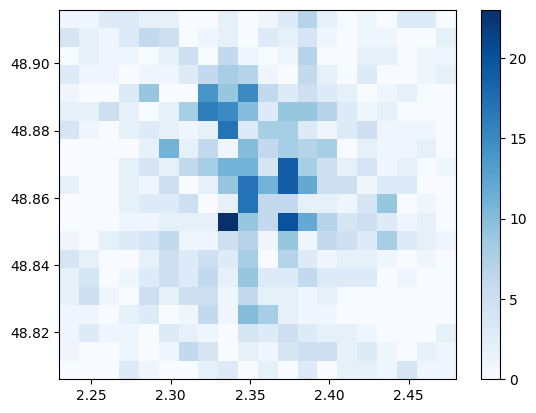

In [ ]:
bars_h = plt.hist2d(bars['longitude'], bars['latitude'], bins=20, range=[[lomin, lomax], [latmin, latmax]], cmap='Blues')
plt.colorbar()

<div class="alert alert-block alert-info">
    Q3.4 - Le paramètre <code>weights</code> de la fonction <code>hist2d</code> permet de donner un poids à chaque lieu de l'échantillon passé en paramètre : le lieu ne comptera pas pour un dans le décompte, mais pour le poids associé. Il est ainsi possible de construire l'histogramme pondéré par la note de chaque lieu.

Enregistrer cet histogramme dans une variable `bars_n`.
</div>

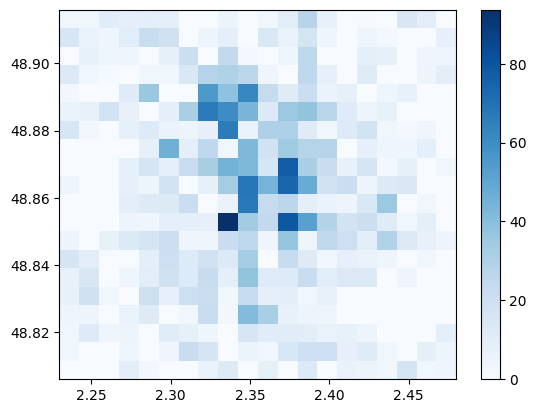

In [ ]:
bars_n = plt.hist2d(bars['longitude'], bars['latitude'], bins=20, range=[[lomin, lomax], [latmin, latmax]], weights=bars['note'], cmap='Blues')
plt.colorbar()

<div class="alert alert-block alert-info">
En mettant en correspondance les deux histogrammes ainsi construits, on peut calculer la moyenne des notes dans chaque case, ce que fait la ligne suivante :
<div>

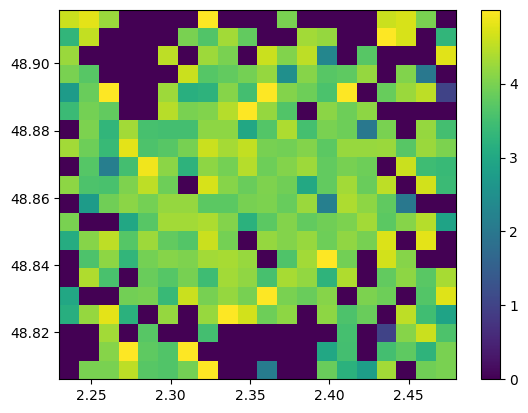

In [ ]:
normalized_hist = bars_n[0] / (bars_h[0] + 1e-6)
plt.imshow(normalized_hist, origin='lower', extent=[lomin, lomax, latmin, latmax], aspect="auto")
_ = plt.colorbar()

<div class="alert alert-block alert-info">
Q3.5 - Faire le même travail sur les restaurants, en enregistrant le résultat dans les variables <code>restos_h</code> et <code>restos_n</code>. Voyez-vous une différence entre les bars et les restaurants ? Entre les différents lieux de Paris ?
</div>

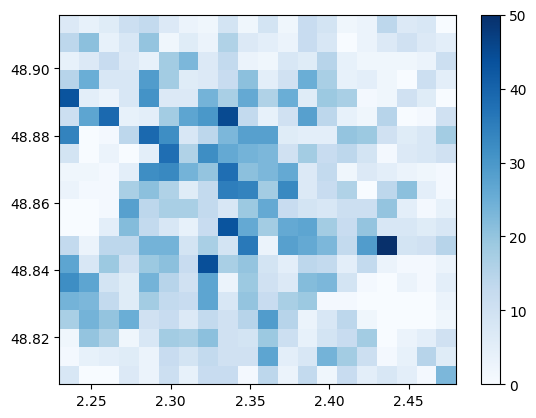

In [ ]:
restos_h = plt.hist2d(restos['longitude'], restos['latitude'], bins=20, range=[[lomin, lomax], [latmin, latmax]], cmap='Blues')
plt.colorbar()

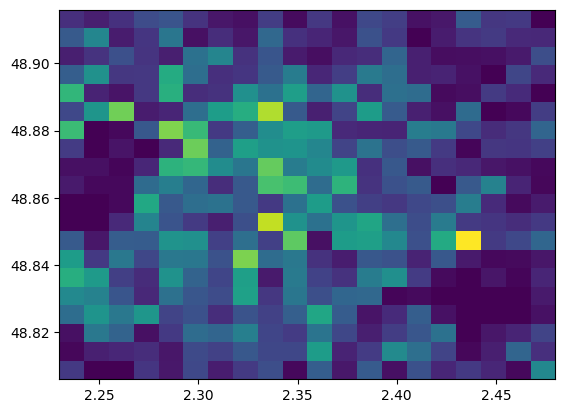

In [ ]:
restos_n= plt.hist2d(restos['longitude'], restos['latitude'], bins=20, range=[[lomin, lomax], [latmin, latmax]] ,weights=restos['note'])

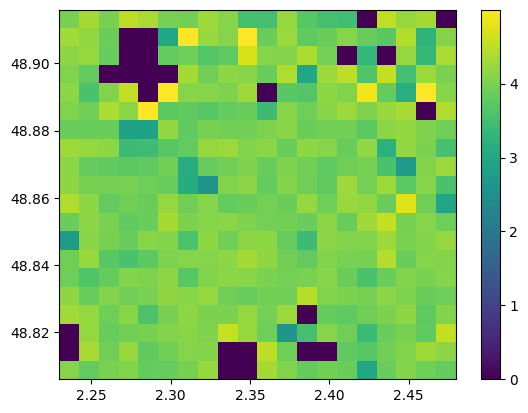

In [ ]:
normalized_restos_hist = restos_n[0] / (restos_h[0] + 1e-6)
plt.imshow(normalized_restos_hist, origin='lower', extent=[lomin, lomax, latmin, latmax], aspect="auto")
_ = plt.colorbar()

In [ ]:
#Bars : Ils tendent à être concentrés dans certaines zones et peuvent présenter une plus grande variabilité dans les notes
#Restaurants : Leur répartition géographique peut être plus uniforme et leurs notes en moyenne peuvent être plus élevées mais cela dépend de la zone.

<div class="alert alert-block alert-warning">
On obtient ainsi d'une part pour les restaurants, d'autre part pour les bars,  $20*20=400$ moyennes correspondant aux 400 régions découpées par l'histogramme et $400$ comptage du nombre de restaurants ou bars.
</div>

<div class="alert alert-block alert-info">
3.6 - Comparer les séries ainsi obtenues : le nombre moyen de bars par région est-il le même que celui de restaurants ? Qui à la plus grosse variance ? Tracer les boîtes à moustache correspondantes à l'aide de la fonction <code>np.ravel()</code> d'un tableau 2D qui  permet de transformer le tableau 2D en un tableau 1D.

3.7 - Refaire le même travail avec un nombre de segments différents et comparer les résultats en fonction du nombre de segments. Quel est le problème pour les analyses sur les notes moyennes ?
</div>

In [ ]:
bars_h, xedges, yedges = np.histogram2d(bars['longitude'], bars['latitude'], bins=20, range=[[lomin, lomax], [latmin, latmax]])
bars_n, xedges, yedges = np.histogram2d(bars['longitude'], bars['latitude'],  weights=bars['note'], bins=20, range=[[lomin, lomax], [latmin, latmax]])
restos_h, xedgesr, yedgesr = np.histogram2d(restos['longitude'], restos['latitude'], bins=20, range=[[lomin, lomax], [latmin, latmax]])
restos_n, xedgesr, yedgesr = np.histogram2d(restos['longitude'], restos['latitude'],  weights=restos['note'], bins=20, range=[[lomin, lomax], [latmin, latmax]])
bars_ravel = np.ravel(bars_n)
restos_ravel = np.ravel(restos_n)
bars_count = np.ravel(bars_h)
restos_count = np.ravel(restos_h)

In [ ]:
mean_bars = np.mean(bars_ravel / (bars_count + 1e-6))
variance_bars = np.var(bars_ravel / (bars_count + 1e-6))

In [ ]:
mean_restos = np.mean(restos_ravel / (restos_count + 1e-6))
variance_restos = np.var(restos_ravel / (restos_count + 1e-6))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc344b34160>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc344b34610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc344b03e80>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc344b34b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc344b34df0>,
 'means': []}

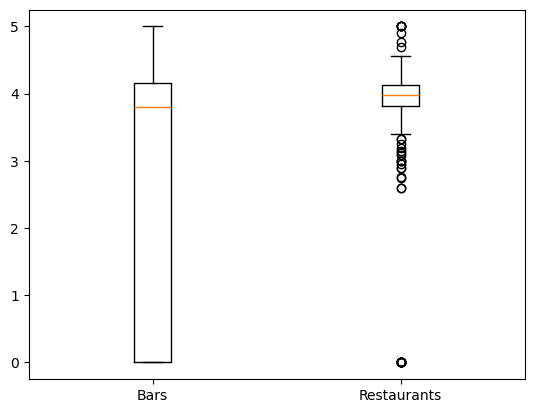

In [ ]:
plt.boxplot([bars_ravel / (bars_count + 1e-6), restos_ravel / (restos_count + 1e-6)],labels=["Bars", "Restaurants"])

In [ ]:
num_bars = 1000
lomin, lomax = -0.5, 2.5
latmin, latmax = 48.8, 49.5
longitude_bars = np.random.uniform(lomin, lomax, num_bars)
latitude_bars = np.random.uniform(latmin, latmax, num_bars)
rat_bars = np.random.uniform(1, 5, num_bars)
num_restos = 1000
longitude_restos = np.random.uniform(lomin, lomax, num_restos)
latitude_restos = np.random.uniform(latmin, latmax, num_restos)
rat_restos = np.random.uniform(1, 5, num_restos)
bins_values = [10, 20, 30, 50]
def calculate_histogram_and_means(longitudes, latitudes, ratings, bins):
    hist, xedges, yedges = np.histogram2d(longitudes, latitudes, bins=bins, range=[[lomin, lomax], [latmin, latmax]])
    weighted_hist, _, _ = np.histogram2d(longitudes, latitudes, weights=ratings, bins=bins, range=[[lomin, lomax], [latmin, latmax]])
    means = np.divide(weighted_hist, hist, where=(hist > 0), out=np.zeros_like(weighted_hist))
    return hist, means

In [ ]:
#Si le nombre de segments est trop élevé certaines régions auront très peu de bars ou de restaurants ce qui peut entraîner des moyennes faussées